In [158]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [159]:
# convert to frame
file_path = "../data/sample/20210812-2000_1_B_std.csv"
file_path_f = "../data/sample/mod_20210812-2000_1_B_std_MI_full2.csv"
df = pd.read_csv(file_path, header=None)
print(df.head())

df[[2,3]] = df[[2,3]].map(lambda x:int(np.ceil(x * 30)))
print(df.head())



           0                                    1       2       3
0  Counselor                           よろしくお願いします  51.517  53.687
1     Client                               お願いします  53.207  54.217
2  Counselor                                   まず  54.737  55.287
3  Counselor  あのーちょっとなんてお呼びしていいかって言うところからねそこで僕の方が  55.427  62.657
4  Counselor               仮名で大谷翔平ということにしときましょうかね  63.367  69.477
           0                                    1     2     3
0  Counselor                           よろしくお願いします  1546  1611
1     Client                               お願いします  1597  1627
2  Counselor                                   まず  1643  1659
3  Counselor  あのーちょっとなんてお呼びしていいかって言うところからねそこで僕の方が  1663  1880
4  Counselor               仮名で大谷翔平ということにしときましょうかね  1902  2085


In [160]:
# concat label

df_f = pd.read_csv(file_path_f)
print(df_f['cat'].head())

df = pd.concat([df, df_f['cat']], axis=1)
print(df.head())

0    24
1    60
2    22
3    24
4    24
Name: cat, dtype: int64
           0                                    1     2     3  cat
0  Counselor                           よろしくお願いします  1546  1611   24
1     Client                               お願いします  1597  1627   60
2  Counselor                                   まず  1643  1659   22
3  Counselor  あのーちょっとなんてお呼びしていいかって言うところからねそこで僕の方が  1663  1880   24
4  Counselor               仮名で大谷翔平ということにしときましょうかね  1902  2085   24


In [161]:
# filter out counselor
df = df[df[0] != 'Counselor']
df[0].head()

1     Client
6     Client
7     Client
10    Client
12    Client
Name: 0, dtype: object

<Axes: xlabel='cat'>

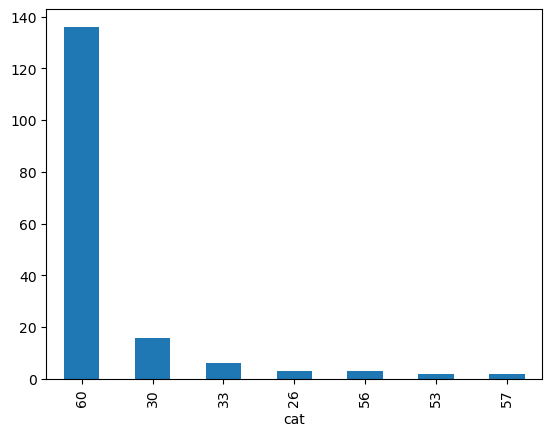

In [162]:

df['cat'].value_counts().plot(kind='bar')

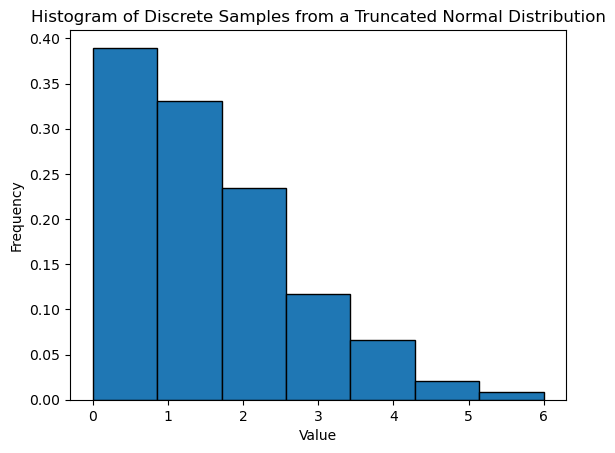

In [163]:
# Solution A truncated normal distribution
# Define the parameters of the truncated normal distribution
mu = 0       # Mean of the distribution
sigma = 2    # Standard deviation of the distribution
lower, upper = -.5, 6.5  # Lower and upper bounds of the truncated normal distribution

# Calculate the a and b parameters for truncnorm
a, b = (lower - mu) / sigma, (upper - mu) / sigma

# Generate samples from the truncated normal distribution
size = 1000  # Number of samples
samples = sp.stats.truncnorm.rvs(a, b, loc=mu, scale=sigma, size=size)

# Discretize the samples to the nearest integer
discrete_samples = np.round(samples).astype(int)

# Filter the samples to ensure they are within the desired discrete range
filtered_samples = discrete_samples[(discrete_samples >= lower) & (discrete_samples <= upper)]

# Plot the histogram of the discrete samples
plt.hist(filtered_samples, bins=7, edgecolor='black', density=True)
plt.title('Histogram of Discrete Samples from a Truncated Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

5994


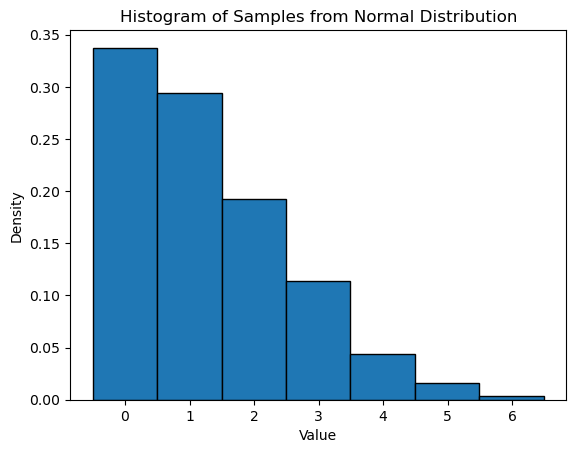

In [164]:
# solution B partial normal distribution
# Parameters of the normal distribution
mu = 0  # Mean
sigma = 2  # Standard deviation
size = 10000  # Number of samples

# Generate random samples from a normal distribution
samples = sp.stats.norm.rvs(loc=mu, scale=sigma, size=size)
c = (samples >= -.5) & (samples <= 6.5)
samples = samples[c]
print(len(samples))

# Discretize the samples to the nearest integer
discrete_samples = np.round(samples).astype(int)

# Plotting a histogram of the samples
plt.hist(samples, bins=7, density=True, edgecolor='black')
plt.title('Histogram of Samples from Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [165]:

def sample_truncated_normal(positivity, mu, sigma, num_samples):
    positives = [53, 54, 55, 56, 57, 58, 59, 60]
    negatives = [26, 27, 28, 29, 30, 31, 33] 
    batch = 1000
    ret = []
    lower = -.5
    while len(ret) < num_samples:
        upper = 6.5 if positivity else 7.5
        a, b = (lower - mu) / sigma, (upper - mu) / sigma
        samples = sp.stats.truncnorm.rvs(a, b, loc=mu, scale=sigma, size=batch)
    
        condition = (samples >= lower) & (samples <= upper)
        samples = samples[condition]
        
        discrete_samples = np.round(samples).astype(int)
        if positivity:
            discrete_samples = [positives[x] for x in discrete_samples]
        else:
            discrete_samples = [negatives[x] for x in discrete_samples]
        ret+=discrete_samples
    return ret[:num_samples]

def sample_partial_normal(positivity, mu, sigma, num_samples):
    positives = [53, 54, 55, 56, 57, 58, 59, 60]
    negatives = [26, 27, 28, 29, 30, 31, 33]    
    batch = 1000
    ret = []
    while len(ret) < num_samples:
        samples = sp.stats.norm.rvs(loc=mu, scale=sigma, size=batch)
        if positivity:
            condition = (samples >= -.5) & (samples <= 7.5)
        else:
            condition = (samples >= -.5) & (samples <= 6.5)
        samples = samples[condition]
        discrete_samples = np.round(samples).astype(int)
        if positivity:
            discrete_samples = [positives[x] for x in discrete_samples]
        else:
            discrete_samples = [negatives[x] for x in discrete_samples]
        ret+=discrete_samples
    return ret[:num_samples]

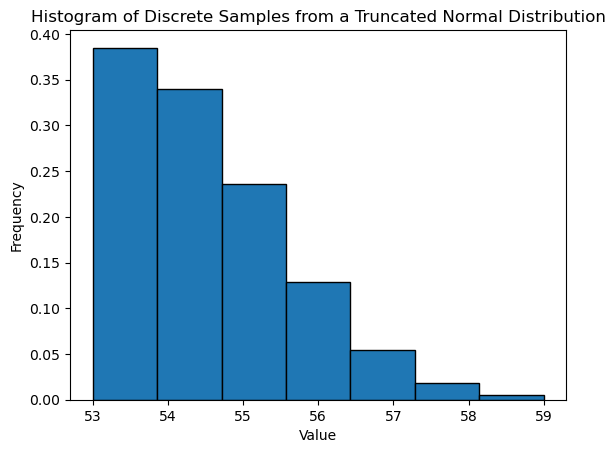

In [166]:
samples = sample_truncated_normal(True, 0, 2, 100000)
# Plot the histogram of the discrete samples
plt.hist(samples, bins=7, density=True, edgecolor='black')
plt.title('Histogram of Discrete Samples from a Truncated Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

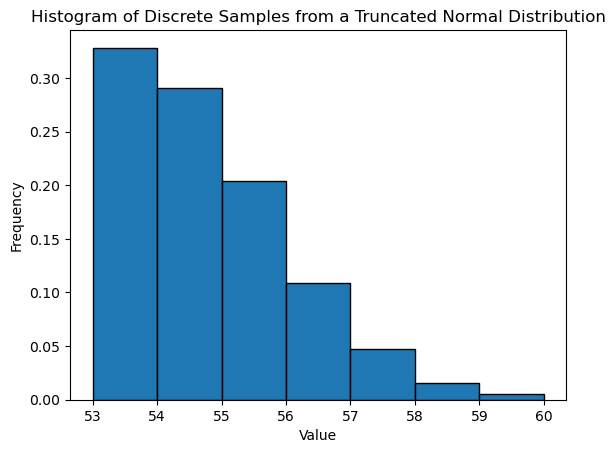

In [167]:
samples = sample_partial_normal(True, 0, 2, 100000)
# Plot the histogram of the discrete samples
plt.hist(samples, bins=7, density=True, edgecolor='black')
plt.title('Histogram of Discrete Samples from a Truncated Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [168]:
# Solution A resampling from the original data 
positives = [53, 54, 55, 56, 57, 58, 59, 60]
negatives = [26, 27, 28, 29, 30, 31, 33]

cnt ={53:0, 54:0, 55:0, 56:0, 57:0, 58:0, 59:0, 60:0, 26:0, 27:0, 28:0, 29:0, 30:0, 31:0, 33:0}
for index, row in df.iterrows():
    utt_len = row[3] - row[2] + 1
    cnt[row['cat']] += utt_len

print(cnt)

# resampling
p_samples = []
n_samples = []
for key in cnt:
    if key in positives:
        p_samples += sample_partial_normal(True, positives.index(key), 2, cnt[key])
    else:
        n_samples += sample_partial_normal(False, negatives.index(key), 2, cnt[key])

    


{53: 145, 54: 0, 55: 0, 56: 204, 57: 83, 58: 0, 59: 0, 60: 5992, 26: 133, 27: 0, 28: 0, 29: 0, 30: 954, 31: 0, 33: 270}


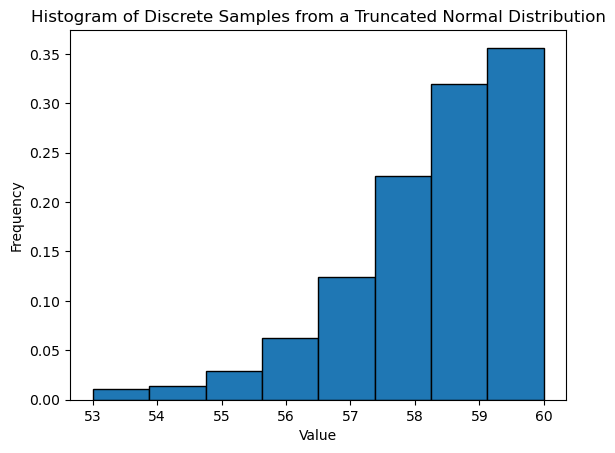

In [169]:
plt.hist(p_samples, bins=8, density=True, edgecolor='black')
plt.title('Histogram of Discrete Samples from a Truncated Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

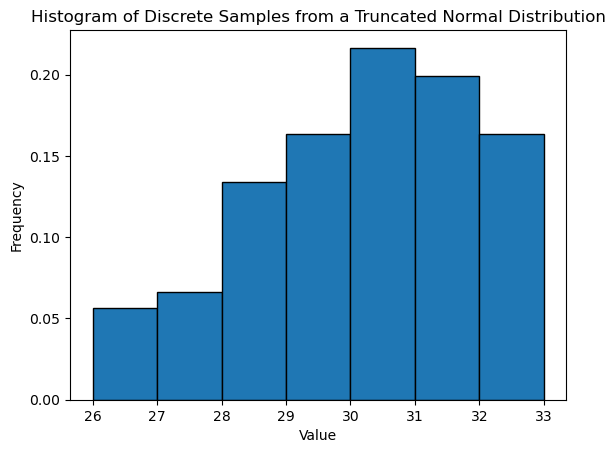

In [170]:

plt.hist(n_samples, bins=7, density=True, edgecolor='black')
plt.title('Histogram of Discrete Samples from a Truncated Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()